# Basic example for using AeroMAPS with Jupyter Notebook

This document represents both an example and a tutorial for using the basic functions of AeroMAPS to simulate and evaluate a transition scenario for the aviation sector.  It is written in the form of a Jupyter Notebook to facilitate its use. The user will be able to adapt this notebook and couple it with other notebooks proposed in the documentation.

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps.core.process import AeromapsProcess
from aeromaps.core.models import models_simple

In [2]:
process = AeromapsProcess(read_json=True, models=models_simple)

## Set up variables

The user can then set the different parameters of the model to generate its scenario. The list of the float inputs can be displayed using this command.

In [3]:
process.list_float_inputs()

{'rpk_short_range_measures_final_impact': 0.0,
 'rpk_medium_range_measures_final_impact': 0.0,
 'rpk_long_range_measures_final_impact': 0.0,
 'rpk_short_range_measures_start_year': 2051,
 'rpk_medium_range_measures_start_year': 2051,
 'rpk_long_range_measures_start_year': 2051,
 'rpk_short_range_measures_duration': 5.0,
 'rpk_medium_range_measures_duration': 5.0,
 'rpk_long_range_measures_duration': 5.0,
 'short_range_rpk_share_2019': 27.2,
 'medium_range_rpk_share_2019': 35.1,
 'long_range_rpk_share_2019': 37.7,
 'covid_start_year': 2020,
 'covid_rpk_drop_start_year': 66.0,
 'covid_end_year': 2024,
 'covid_end_year_reference_rpk_ratio': 100.0,
 'growth_rate_2020_2030_short_range': 3.0,
 'growth_rate_2030_2040_short_range': 3.0,
 'growth_rate_2040_2050_short_range': 3.0,
 'growth_rate_2020_2030_medium_range': 3.0,
 'growth_rate_2030_2040_medium_range': 3.0,
 'growth_rate_2040_2050_medium_range': 3.0,
 'growth_rate_2020_2030_long_range': 3.0,
 'growth_rate_2030_2040_long_range': 3.0,
 '

 In the following, some main parameters are for instance set up.

In [4]:
# Air traffic evolution

## Growth rate by category and decade [%]
process.parameters.growth_rate_2020_2030_short_range = 3
process.parameters.growth_rate_2030_2040_short_range = 3
process.parameters.growth_rate_2040_2050_short_range = 3
process.parameters.growth_rate_2020_2030_medium_range = 3
process.parameters.growth_rate_2030_2040_medium_range = 3
process.parameters.growth_rate_2040_2050_medium_range = 3
process.parameters.growth_rate_2020_2030_long_range = 3
process.parameters.growth_rate_2030_2040_long_range = 3
process.parameters.growth_rate_2040_2050_long_range = 3
process.parameters.growth_rate_2020_2030_freight = 3
process.parameters.growth_rate_2030_2040_freight = 3
process.parameters.growth_rate_2040_2050_freight = 3

In [5]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 85  # 2019 value: 82.399312

In [6]:
# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

## Drop-in aircraft
### Mean annual efficiency gains by category [%]
process.parameters.energy_per_ask_short_range_dropin_fuel_gain = 1.5
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain = 1.5
process.parameters.energy_per_ask_long_range_dropin_fuel_gain = 1.5

## Hydrogen aircraft
### Values for setting logistic functions by category
process.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process.parameters.hydrogen_introduction_year_short_range = 2035
process.parameters.fleet_renewal_duration = 20.0
### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range = 1.0

In [7]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [8]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix by decade (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_2030 = 4.8
process.parameters.biofuel_share_2040 = 24.0
process.parameters.biofuel_share_2050 = 35.0
process.parameters.electrofuel_share_2030 = 1.2
process.parameters.electrofuel_share_2040 = 10.0
process.parameters.electrofuel_share_2050 = 35.0

In [9]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 280.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 250.0

In [10]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

In [11]:
# Various environmental settings

## Share of biofuel production pathways by decade (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_2030 = 100.0
process.parameters.biofuel_hefa_fog_share_2040 = 0.7
process.parameters.biofuel_hefa_fog_share_2050 = 0.7
process.parameters.biofuel_hefa_others_share_2030 = 0.0
process.parameters.biofuel_hefa_others_share_2040 = 3.8
process.parameters.biofuel_hefa_others_share_2050 = 3.8
process.parameters.biofuel_ft_others_share_2030 = 0
process.parameters.biofuel_ft_others_share_2040 = 76.3
process.parameters.biofuel_ft_others_share_2050 = 76.3
process.parameters.biofuel_ft_msw_share_2030 = 0.0
process.parameters.biofuel_ft_msw_share_2040 = 7.4
process.parameters.biofuel_ft_msw_share_2050 = 7.4

## Emission factors for electricity by decade (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_2020 = 429
process.parameters.electricity_emission_factor_2030 = 200
process.parameters.electricity_emission_factor_2040 = 100
process.parameters.electricity_emission_factor_2050 = 30

## Share of hydrogen production pathways by decade (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_2030 = 100
process.parameters.hydrogen_electrolysis_share_2040 = 100
process.parameters.hydrogen_electrolysis_share_2050 = 100
process.parameters.hydrogen_gas_ccs_share_2030 = 0
process.parameters.hydrogen_gas_ccs_share_2040 = 0
process.parameters.hydrogen_gas_ccs_share_2050 = 0
process.parameters.hydrogen_coal_ccs_share_2030 = 0
process.parameters.hydrogen_coal_ccs_share_2040 = 0
process.parameters.hydrogen_coal_ccs_share_2050 = 0
process.parameters.hydrogen_gas_share_2030 = 0
process.parameters.hydrogen_gas_share_2040 = 0
process.parameters.hydrogen_gas_share_2050 = 0

## Compute

Once all the parameters have been set up, the user can compute.

In [12]:
process.compute()

## Results

The user can then display the results. The user has access to float outputs but also to annual data outputs, with the possibility of choosing the output.

In [13]:
process.data["float_outputs"]

{'cagr_rpk_short_range': 2.5948580077686634,
 'cagr_rpk_medium_range': 2.5948580077686634,
 'cagr_rpk_long_range': 2.5948580077686634,
 'cagr_rpk': 2.5948580077686634,
 'prospective_evolution_rpk_short_range': 115.65912675438419,
 'prospective_evolution_rpk_medium_range': 115.65912675438427,
 'prospective_evolution_rpk_long_range': 115.65912675438427,
 'prospective_evolution_rpk': 115.65912675438427,
 'cagr_rtk': 2.5948580077686634,
 'prospective_evolution_rtk': 115.65912675438419,
 'gross_carbon_budget': 1130.0,
 'gross_carbon_budget_2050': 797.2411428790518,
 'aviation_carbon_budget': 20.72826971485535,
 'equivalent_gross_carbon_budget': 1574.4444444444443,
 'equivalent_gross_carbon_budget_2050': 1102.610171118651,
 'aviation_equivalent_carbon_budget': 56.23311872705119,
 'solid_waste_biomass': 11.0,
 'oil_crops_biomass': 5.67,
 'sugarystarchy_crops_biomass': 17.64,
 'lignocellulosic_crops_biomass': 39.69,
 'available_biomass_hefa_fog': 1.0,
 'available_biomass_hefa_others': 20.67,
 

In [14]:
process.data["vector_outputs"]

,aerosol_erf,annual_co2_erf,ask,ask_long_range,ask_long_range_dropin_fuel,ask_long_range_dropin_fuel_share,ask_long_range_hydrogen,ask_long_range_hydrogen_share,ask_medium_range,ask_medium_range_dropin_fuel,ask_medium_range_dropin_fuel_share,ask_medium_range_hydrogen,ask_medium_range_hydrogen_share,ask_short_range,ask_short_range_dropin_fuel,ask_short_range_dropin_fuel_share,ask_short_range_hydrogen,ask_short_range_hydrogen_share,biofuel_atj_efficiency,biofuel_atj_emission_factor,biofuel_atj_share,biofuel_ft_efficiency,biofuel_ft_msw_emission_factor,biofuel_ft_msw_share,biofuel_ft_others_emission_factor,biofuel_ft_others_share,biofuel_hefa_fog_emission_factor,biofuel_hefa_fog_share,biofuel_hefa_fuel_efficiency,biofuel_hefa_oil_efficiency,biofuel_hefa_others_emission_factor,biofuel_hefa_others_share,biofuel_mean_emission_factor,biofuel_share,biomass_atj_consumption,biomass_consumption,biomass_ft_consumption,biomass_hefa_fog_consumption,biomass_hefa_others_consumption,co2_emissions,co2_emissions_2019technology,co2_emissions_2019technology_baseline3,co2_emissions_freight,co2_emissions_including_aircraft_efficiency,co2_emissions_including_energy,co2_emissions_including_load_factor,co2_emissions_including_operations,co2_emissions_long_range,co2_emissions_medium_range,co2_emissions_passenger,co2_emissions_per_rpk,co2_emissions_per_rtk,co2_emissions_short_range,co2_emissions_smooth,co2_erf,co2_erf_smooth,co2_h2o_erf,co2_h2o_nox_contrails_erf,co2_h2o_nox_erf,co2_per_energy_mean,co2_total_erf_ratio,contrails_erf,cumulative_co2_emissions,cumulative_co2_emissions_2019technology,cumulative_co2_emissions_2019technology_baseline3,cumulative_co2_emissions_including_energy,cumulative_co2_emissions_including_load_factor,cumulative_co2_emissions_smooth,cumulative_non_co2_equivalent_emissions,cumulative_total_equivalent_emissions,electricity_consumption,electricity_electrofuel_consumption,electricity_emission_factor,electricity_hydrogen_consumption,electrofuel_emission_factor,...,energy_consumption_short_range_electrofuel,energy_consumption_short_range_electrofuel_without_operations,energy_consumption_short_range_hydrogen,energy_consumption_short_range_hydrogen_without_operations,energy_consumption_short_range_kerosene,energy_consumption_short_range_kerosene_without_operations,energy_consumption_short_range_without_operations,energy_consumption_without_operations,energy_per_ask_long_range_dropin_fuel,energy_per_ask_long_range_hydrogen,energy_per_ask_mean,energy_per_ask_mean_without_operations,energy_per_ask_medium_range_dropin_fuel,energy_per_ask_medium_range_hydrogen,energy_per_ask_short_range_dropin_fuel,energy_per_ask_short_range_hydrogen,energy_per_ask_without_operations_long_range_dropin_fuel,energy_per_ask_without_operations_long_range_hydrogen,energy_per_ask_without_operations_medium_range_dropin_fuel,energy_per_ask_without_operations_medium_range_hydrogen,energy_per_ask_without_operations_short_range_dropin_fuel,energy_per_ask_without_operations_short_range_hydrogen,energy_per_rtk_freight_dropin_fuel,energy_per_rtk_freight_hydrogen,energy_per_rtk_mean,energy_per_rtk_mean_without_operations,energy_per_rtk_without_operations_freight_dropin_fuel,energy_per_rtk_without_operations_freight_hydrogen,h2o_emissions,h2o_erf,hydrogen_coal_ccs_share,hydrogen_coal_share,hydrogen_electrolysis_emission_factor,hydrogen_electrolysis_share,hydrogen_gas_ccs_share,hydrogen_gas_share,hydrogen_mean_emission_factor,kerosene_emission_factor,kerosene_share,liquefaction_efficiency,load_factor,non_co2_equivalent_emissions,non_co2_erf_smooth,non_co2_erf_smooth_variation,nox_emissions,nox_erf,operations_contrails_gain,operations_contrails_overconsumption,operations_gain,rpk,rpk_long_range,rpk_long_range_measures_impact,rpk_medium_range,rpk_medium_range_measures_impact,rpk_reference,rpk_short_range,rpk_short_range_measures_impact,rtk,rtk_dropin_fuel,rtk_dropin_fuel_share,rtk_hydrogen,rtk_hydrogen_share,rtk_reference,soot_emissions,soot_erf,sulfur_emissions,sulfur_erf

In [15]:
process.data["vector_outputs"]["cumulative_co2_emissions"]

2000          NaN
2001          NaN
2002          NaN
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007          NaN
2008          NaN
2009          NaN
2010          NaN
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019     0.000000
2020     0.604147
2021     1.147278
2022     1.855939
2023     2.724548
2024     3.747696
2025     4.781593
2026     5.823956
2027     6.875331
2028     7.934213
2029     8.998494
2030    10.065737
2031    11.132875
2032    12.196738
2033    13.253937
2034    14.300964
2035    15.334484
2036    16.352021
2037    17.352368
2038    18.334163
2039    19.295874
2040    20.235722
2041    21.153002
2042    22.045275
2043    22.909571
2044    23.742457
2045    24.540193
2046    25.298914
2047    26.014740
2048    26.683761
2049    27.301934
2050    27.864931
Name: cumulative_co2_emissions, dtype: float64

The user can write the results to an Excel file with the following command.

In [16]:
process.write_excel(file_name="aeromaps_data.xlsx")

## Plots

Lastly, the user can also plot different parameters based on a database of plots. The list of the available plots can be displayed using the following command.

In [17]:
process.list_available_plots()

['air_transport_co2_emissions',
 'air_transport_climate_impacts',
 'carbon_budget_assessment',
 'equivalent_carbon_budget_assessment',
 'biomass_resource_budget_assessment',
 'electricity_resource_budget_assessment',
 'multidisciplinary_assessment',
 'temperature_increase_from_air_transport',
 'biomass_consumption',
 'electricity_consumption',
 'co2_per_rpk',
 'co2_per_rtk',
 'passenger_kaya_factors',
 'freight_kaya_factors',
 'levers_of_action_distribution',
 'revenue_passenger_kilometer',
 'revenue_tonne_kilometer',
 'available_seat_kilometer',
 'total_aircraft_distance',
 'load_factor',
 'energy_per_ask',
 'energy_per_rtk',
 'energy_consumption',
 'fuel_consumption_liter_per_pax_100km',
 'mean_fuel_emission_factor',
 'emission_factor_per_fuel',
 'cumulative_co2_emissions',
 'direct_h2o_emissions',
 'direct_nox_emissions',
 'direct_sulfur_emissions',
 'direct_soot_emissions',
 'equivalent_emissions',
 'cumulative_equivalent_emissions',
 'equivalent_emissions_ratio',
 'final_effective

The user can thus display a figure of this list, for instance the CO<sub>2</sub> emissions of the simulated scenario.

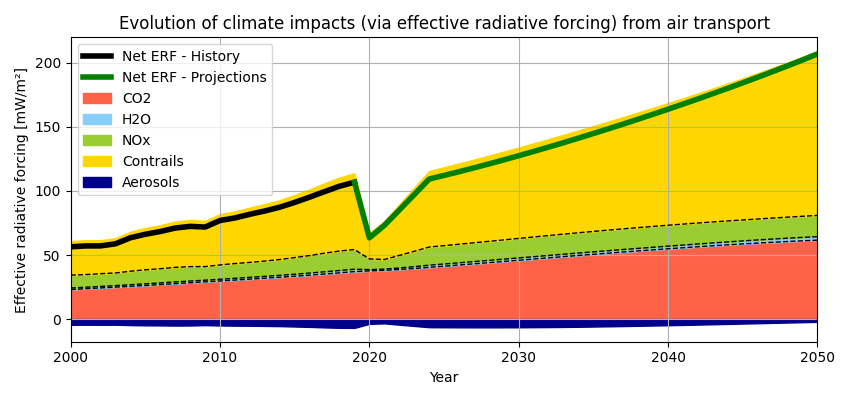

In [18]:
process.plot("air_transport_climate_impacts")

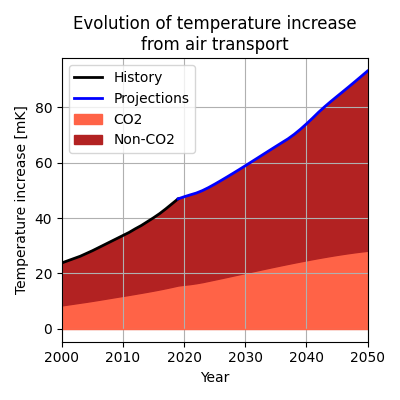

In [19]:
process.plot("temperature_increase_from_air_transport")